<a href="https://colab.research.google.com/github/obaniah/Assignment-3-CS-4783-5783---Oday-Bani-Ahmadd/blob/main/Q2_AS_3_ML_CS_5783_ODAY_BANI_AHMAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , MaxPooling2D , Dropout 
from keras import optimizers
import tensorflow as tf


In [ ]:
data = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

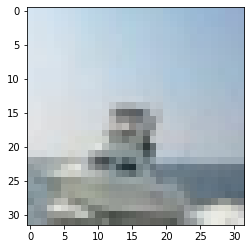

In [ ]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(x_train[100])

In [ ]:
#check image shape
x_train[0].shape

(32, 32, 3)

In [ ]:
# cifar10.data_path = "data/CIFAR-10/"

Q2 3.Try different hyperparameters to obtain the best accuracy on the test set. What is your 
best performance and what were the hyperparameters? 

In [ ]:
import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , MaxPooling2D , Dropout 

model_1 = keras.Sequential()

model_1.add(Conv2D(6, (5, 5), padding='same', strides = (1,1) ,activation='relu', input_shape=(32,32,3)))
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_1.add(Conv2D(16, (5, 5), strides=(1,1) , activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_1.add(Conv2D(120, (5, 5), strides=(1,1) , activation='relu'))

model_1.add(Flatten())
model_1.add(Dense(units=84, activation='relu'))
model_1.add(Dense(units=10, activation = 'softmax'))


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)               0

Q2 1. What is the effect of learning rate on the training process? Which performed best?


---








Lr controls how quickly or slowly a neural network model learns a problem. Moreover, the amount that the weights are updated during training is referred to as the step size. in my application there was, no significance affects but the range of values to consider for the learning rate is less than 1.0 and greater than 10^-6. A traditional default value for the learning rate is 0.1 or 0.01, and this may represent a good starting point on your problem. 

Q2 2. What is the effect of batch size on the training process? Which performed best?

---



Batch size controls the accuracy of the estimate of the error gradient when training neural networks. When I used a variety of batch size i noticed that with the smaller batch size the value of loss will be less  

Q2 3.Try different hyperparameters to obtain the best accuracy on the test set. 


---



What is your best performance and what were the hyperparameters? 


---
My best output: 
learning rate=0.00001, batch = 16 acc =: 0.5507 

---



Using Adam with the following set of epochs = 25 and the follwoing hyperparameters :
 
                                             acc = 0.5495  
 
learning rate=0.001 acc =:0.5429 
 
learning rate=0.0001 acc =:0.5488 
 
learning rate=0.0001, batch = 512 acc =: 0.5484 
 
learning rate=0.0001, batch = 256 acc =: 0.5477 
 
learning rate=0.0001, batch = 1028 acc =: 0.5471 the fastest 
 
learning rate=0.0001, batch = 32 acc =: 0.5462 
 
learning rate=0.00001, batch = 16 acc =: 0.5507 



In [ ]:
#compile model using accuracy to measure model performance
model_1.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
#train the model
model_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Epoch 1/25
1563/1563 [==============================] - 18s 5ms/step - loss: 1.7491 - accuracy: 0.3788 - val_loss: 1.5107 - val_accuracy: 0.4536
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4305 - accuracy: 0.4914 - val_loss: 1.4021 - val_accuracy: 0.5090
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3080 - accuracy: 0.5386 - val_loss: 1.3515 - val_accuracy: 0.5164
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2296 - accuracy: 0.5676 - val_loss: 1.2384 - val_accuracy: 0.5695
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1638 - accuracy: 0.5901 - val_loss: 1.2627 - val_accuracy: 0.5662
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1037 - accuracy: 0.6118 - val_loss: 1.3181 - val_accuracy: 0.5500
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0498 - accuracy: 0.6302 - val_loss: 1.2582 - val_accuracy

In [ ]:
#learning_rate=0.001

optm = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1.compile(optimizer=optm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5886 - accuracy: 0.7959 - val_loss: 2.0440 - val_accuracy: 0.5454
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5620 - accuracy: 0.8037 - val_loss: 1.9655 - val_accuracy: 0.5637
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5552 - accuracy: 0.8075 - val_loss: 1.9782 - val_accuracy: 0.5516
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5347 - accuracy: 0.8136 - val_loss: 2.0935 - val_accuracy: 0.5431
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5310 - accuracy: 0.8152 - val_loss: 2.0440 - val_accuracy: 0.5519
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5194 - accuracy: 0.8202 - val_loss: 2.3478 - val_accuracy: 0.5365
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5217 - accuracy: 0.8189 - val_loss: 2.2247 - val_accuracy:

In [ ]:
#learning_rate=0.0001

optm = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1.compile(optimizer=optm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)


Epoch 1/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2062 - accuracy: 0.9281 - val_loss: 3.3417 - val_accuracy: 0.5548
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1442 - accuracy: 0.9507 - val_loss: 3.6414 - val_accuracy: 0.5544
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1177 - accuracy: 0.9604 - val_loss: 3.9422 - val_accuracy: 0.5517
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0988 - accuracy: 0.9682 - val_loss: 4.2883 - val_accuracy: 0.5513
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0844 - accuracy: 0.9737 - val_loss: 4.5725 - val_accuracy: 0.5506
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0724 - accuracy: 0.9777 - val_loss: 4.8106 - val_accuracy: 0.5524
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0623 - accuracy: 0.9816 - val_loss: 5.2364 - val_accuracy:

In [ ]:
#  batch_size = 512
##learning_rate=0.0001


optm = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1.compile(optimizer=optm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size = 512)

Epoch 1/25
98/98 [==============================] - 2s 13ms/step - loss: 0.0070 - accuracy: 0.9981 - val_loss: 10.4090 - val_accuracy: 0.5480
Epoch 2/25
98/98 [==============================] - 1s 8ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 10.6029 - val_accuracy: 0.5483
Epoch 3/25
98/98 [==============================] - 1s 8ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 10.7561 - val_accuracy: 0.5482
Epoch 4/25
98/98 [==============================] - 1s 9ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 10.9191 - val_accuracy: 0.5486
Epoch 5/25
98/98 [==============================] - 1s 9ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 11.0444 - val_accuracy: 0.5493
Epoch 6/25
98/98 [==============================] - 1s 8ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 11.2599 - val_accuracy: 0.5479
Epoch 7/25
98/98 [==============================] - 1s 9ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 11.2302 - val_accuracy: 0.5493
Epoch 8/25
9

In [ ]:
#  batch_size = 256
##learning_rate=0.0001


optm = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1.compile(optimizer=optm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size = 256)


Epoch 1/25
196/196 [==============================] - 2s 8ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 13.3783 - val_accuracy: 0.5491
Epoch 2/25
196/196 [==============================] - 1s 6ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 13.4320 - val_accuracy: 0.5486
Epoch 3/25
196/196 [==============================] - 1s 6ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 13.6317 - val_accuracy: 0.5491
Epoch 4/25
196/196 [==============================] - 1s 6ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 13.7670 - val_accuracy: 0.5494
Epoch 5/25
196/196 [==============================] - 1s 6ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 13.8487 - val_accuracy: 0.5497
Epoch 6/25
196/196 [==============================] - 1s 6ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 13.9044 - val_accuracy: 0.5478
Epoch 7/25
196/196 [==============================] - 1s 6ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 13.9386 - val_accuracy: 0.5498

In [ ]:
#  batch_size = 1028
##learning_rate=0.0001


optm = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1.compile(optimizer=optm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size = 1028)


Epoch 1/25
49/49 [==============================] - 2s 27ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 14.9234 - val_accuracy: 0.5466
Epoch 2/25
49/49 [==============================] - 1s 15ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 14.9558 - val_accuracy: 0.5473
Epoch 3/25
49/49 [==============================] - 1s 15ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 15.0701 - val_accuracy: 0.5485
Epoch 4/25
49/49 [==============================] - 1s 15ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 15.2027 - val_accuracy: 0.5478
Epoch 5/25
49/49 [==============================] - 1s 15ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 15.2956 - val_accuracy: 0.5504
Epoch 6/25
49/49 [==============================] - 1s 15ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 15.4183 - val_accuracy: 0.5489
Epoch 7/25
49/49 [==============================] - 1s 15ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 15.5454 - val_accuracy: 0.5486
Epoch 

In [ ]:
#  batch_size = 32
##learning_rate=0.0001


optm = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1.compile(optimizer=optm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size = 32)


Epoch 1/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 15.4923 - val_accuracy: 0.5433
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 15.6614 - val_accuracy: 0.5419
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 15.4636 - val_accuracy: 0.5457
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 15.0692 - val_accuracy: 0.5457
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 15.2980 - val_accuracy: 0.5426
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 15.1886 - val_accuracy: 0.5475
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 15.3779 - val_ac

In [ ]:
# batch_size = 16
#learning_rate=0.00001


optm = optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1.compile(optimizer=optm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size = 16)


Epoch 1/25
3125/3125 [==============================] - 12s 4ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 15.7184 - val_accuracy: 0.5496
Epoch 2/25
3125/3125 [==============================] - 11s 4ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 15.8165 - val_accuracy: 0.5484
Epoch 3/25
3125/3125 [==============================] - 11s 4ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 16.0614 - val_accuracy: 0.5491
Epoch 4/25
3125/3125 [==============================] - 11s 4ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 16.2479 - val_accuracy: 0.5491
Epoch 5/25
3125/3125 [==============================] - 11s 4ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 16.3581 - val_accuracy: 0.5496
Epoch 6/25
3125/3125 [==============================] - 11s 4ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 16.6217 - val_accuracy: 0.5496
Epoch 7/25
3125/3125 [==============================] - 11s 4ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 16.7905 -

Q2 4. Implement an equivalent feed forward network for the same task with each hidden layer 
containing the same number of neurons as the number of filters in each convolution layer. 
Use the ‘Adam’ optimizer to train your network on the CIFAR-10 dataset for a fixed set of 
25  epochs.  Compare  its  performance  with  your  LeNet  implementation  based  on  the 
following questions: 





1.    What is its performance? 

---


best performance with batch size 512 as the acc = 0.3264 per my trail. 
---



2.    How  many  parameters  are  there  in  this  network  compared  to  the  LeNet implementation? Are they worth it? 

---

*   At this model the Total params: 872,510 Trainable params: 872,510 non-trainable params: 0


*   At LeNet Total params: 92,246 Trainable params: 92,246 non-trainable params: 0 

*   It is not worth to have such and huge amount of params especially that the accuracy is less in these feedforward network. 







In [ ]:
import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Flatten , MaxPooling2D  

input_shape=(32,32,3)
model_fd = keras.Sequential()
keras.Input(input_shape)
model_fd.add(Dense(units=6, activation='relu'))
model_fd.add(Dense(units=16, activation='relu'))
model_fd.add(Dense(units=120, activation='relu'))
model_fd.add(Dense(units=84, activation='relu'))
model_fd.add(Flatten())
model_fd.add(Dense(units=10, activation = 'softmax'))


In [ ]:
#compile model using accuracy to measure model performance
model_fd.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
#train the model
model_fd.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)
model_fd.summary()

Epoch 1/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8643 - accuracy: 0.7092 - val_loss: 6.9721 - val_accuracy: 0.3080
Epoch 2/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8223 - accuracy: 0.7220 - val_loss: 7.6435 - val_accuracy: 0.2968
Epoch 3/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8130 - accuracy: 0.7256 - val_loss: 7.8983 - val_accuracy: 0.3035
Epoch 4/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8026 - accuracy: 0.7292 - val_loss: 7.7283 - val_accuracy: 0.2983
Epoch 5/25
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7932 - accuracy: 0.7320 - val_loss: 8.4103 - val_accuracy: 0.3015
Epoch 6/25
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7958 - accuracy: 0.7348 - val_loss: 8.0144 - val_accuracy: 0.2925
Epoch 7/25
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7859 - accuracy: 0.7382 - val_loss: 8.5888 - val_ac

In [ ]:
#compile model using accuracy to measure model performance
model_fd.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
#train the model
model_fd.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25 , batch_size= 512)

Epoch 1/25
98/98 [==============================] - 7s 69ms/step - loss: 2.1961 - accuracy: 0.1953 - val_loss: 2.1907 - val_accuracy: 0.2195
Epoch 2/25
98/98 [==============================] - 7s 67ms/step - loss: 2.1290 - accuracy: 0.2316 - val_loss: 2.2296 - val_accuracy: 0.1682
Epoch 3/25
98/98 [==============================] - 7s 67ms/step - loss: 2.1287 - accuracy: 0.2151 - val_loss: 2.2641 - val_accuracy: 0.1669
Epoch 4/25
98/98 [==============================] - 7s 67ms/step - loss: 2.0774 - accuracy: 0.2538 - val_loss: 2.1403 - val_accuracy: 0.2715
Epoch 5/25
98/98 [==============================] - 7s 67ms/step - loss: 2.0504 - accuracy: 0.2609 - val_loss: 2.2278 - val_accuracy: 0.2307
Epoch 6/25
98/98 [==============================] - 7s 67ms/step - loss: 1.9478 - accuracy: 0.3174 - val_loss: 2.2171 - val_accuracy: 0.2532
Epoch 7/25
98/98 [==============================] - 7s 67ms/step - loss: 2.0767 - accuracy: 0.2262 - val_loss: 2.3850 - val_accuracy: 0.1466
Epoch 8/25
98

In [ ]:
#compile model using accuracy to measure model performance
model_fd.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
#train the model
model_fd.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25 , batch_size= 1028)

Epoch 1/25
49/49 [==============================] - 7s 131ms/step - loss: 1.5542 - accuracy: 0.4542 - val_loss: 3.2161 - val_accuracy: 0.3181
Epoch 2/25
49/49 [==============================] - 6s 125ms/step - loss: 1.3815 - accuracy: 0.5266 - val_loss: 3.3620 - val_accuracy: 0.3081
Epoch 3/25
49/49 [==============================] - 6s 126ms/step - loss: 1.3598 - accuracy: 0.5350 - val_loss: 3.2929 - val_accuracy: 0.3288
Epoch 4/25
49/49 [==============================] - 6s 126ms/step - loss: 1.3296 - accuracy: 0.5450 - val_loss: 3.4378 - val_accuracy: 0.3319
Epoch 5/25
49/49 [==============================] - 6s 127ms/step - loss: 1.3090 - accuracy: 0.5543 - val_loss: 3.5957 - val_accuracy: 0.3332
Epoch 6/25
49/49 [==============================] - 6s 125ms/step - loss: 1.3242 - accuracy: 0.5491 - val_loss: 3.6434 - val_accuracy: 0.3199
Epoch 7/25
49/49 [==============================] - 6s 126ms/step - loss: 1.3150 - accuracy: 0.5522 - val_loss: 3.6315 - val_accuracy: 0.3167
Epoch 